In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv']


In [2]:
d = pd.read_csv('../input/train.csv')
d.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = d['label']

d = d.drop(['label'] , axis  = 1)
d.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


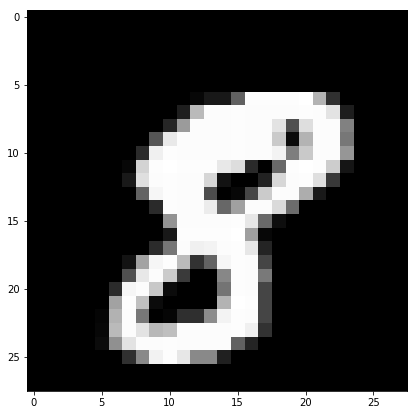

8


In [5]:
plt.figure(figsize= (7,7))
idx = 10

grid = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid , interpolation = None , cmap = "gray")
plt.show()

print(l[idx])

In [6]:
## get the 15 k rows of the label and table 

data = d.head(15000)
label = l.head(15000)

print("The shape of the data" , data.shape)

The shape of the data (15000, 784)


In [7]:
## data preprocessing : standardising the data 
from sklearn.preprocessing import StandardScaler
standardized_data  = StandardScaler().fit_transform(data)
standardized_data.shape

(15000, 784)

In [8]:
## lets just calculate the cov matrix 
sample_data = standardized_data 

cov_mat = np.matmul(sample_data.T , sample_data)

print("the shape of covariance matrix" , cov_mat.shape)

the shape of covariance matrix (784, 784)


In [9]:
## now lets find top two eigen values and thier corresponding eigen vectors 
from scipy.linalg import eigh
## eigh function will return the eighrn values in the ascending order 
## this code will generates only the top two (782 , 783)
values , vectors = eigh(cov_mat , eigvals =(782 , 783))

print("Shape of eigen vectors" , vectors.shape)

vectors_t = vectors.T

print('Updated shape of vectors ' , vectors_t.shape)


Shape of eigen vectors (784, 2)
Updated shape of vectors  (2, 784)


In [10]:
## now multiply the eigen vecctor with the sample_data
new_cordinates = np.matmul(vectors_t , sample_data.T)
print('Resultant shape of new_cordinate is' , new_cordinates.shape)

Resultant shape of new_cordinate is (2, 15000)


In [11]:
new = np.vstack((new_cordinates , label)).T

data_frame = pd.DataFrame(data = new , columns  =['1st principal' , '2nd principal' , 'label'])
data_frame.head()

,1st principal,2nd principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


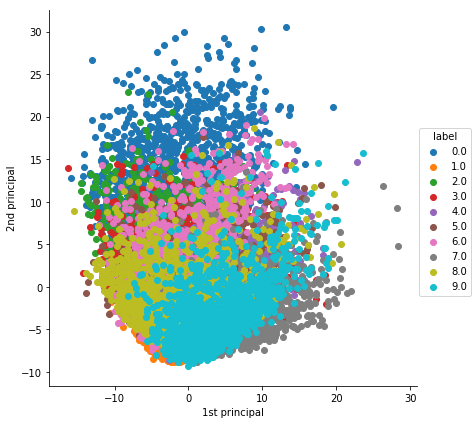

In [12]:
## now lets visualise the data with seaborn 
import seaborn as sns 
sns.FacetGrid(data_frame , hue = 'label'  , size = 6).map(plt.scatter, '1st principal' ,'2nd principal').add_legend()


In [13]:
## all the operations starting from the standardising data to thevisualising of data can be done by using the sklearn functions 
## within just three lines 
from sklearn import decomposition 
pca = decomposition.PCA()


In [14]:
pca.n_components = 2 
pca_data = pca.fit_transform(sample_data)

print('Shape of pca_data ' , pca_data.shape)
print('Shape of label' , label.shape)

Shape of pca_data  (15000, 2)
Shape of label (15000,)


In [15]:
## now lets plot the data 
n = np.vstack((pca_data.T , label)).T
t = pd.DataFrame(data = n , columns = ['1st_principal' , '2nd_principal' , 'labels'])
type(t)

pandas.core.frame.DataFrame

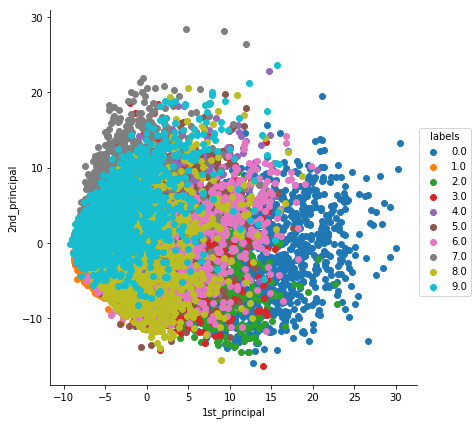

In [16]:
## buid the visualization via sns 
sns.FacetGrid(t , hue = 'labels' , size = 6 ).map(plt.scatter , '1st_principal' , '2nd_principal').add_legend()
plt.show()

## Almost same plot just the rotation of 90 degree 

# Now we will expore the same PCA for dimensionality reduction 

In [17]:
pca.n_components = 784 
pca_data = pca.fit_transform(sample_data)

per_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_variance_explained = np.cumsum(per_var_explained)

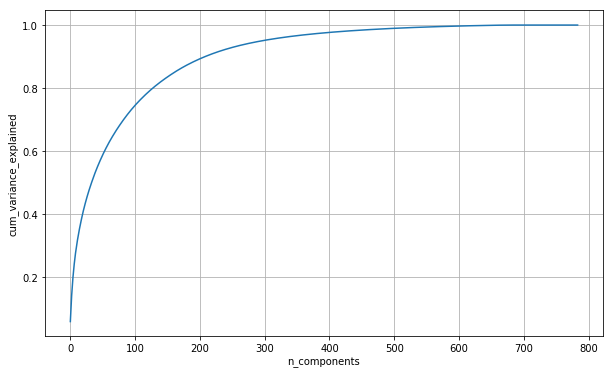

In [18]:
plt.figure(1, figsize = (10 , 6))

plt.clf()
plt.plot(cum_variance_explained)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cum_variance_explained')
plt.show()

# Lets build the T-SNE on the mist data 

In [19]:
import sklearn
from sklearn.manifold import TSNE 

## because running TSNE is little expensive in terms of time , so we will run just for 1000 values 
data_1000 = standardized_data[0:1000 , :]
label_1000 = label[0:1000]

tsne = TSNE(n_components = 2 , random_state = 0)
## we will leave the other parameters as default 

tsne_data = tsne.fit_transform(data_1000)


In [20]:
print(tsne_data.shape)
print(label_1000.shape)

(1000, 2)
(1000,)


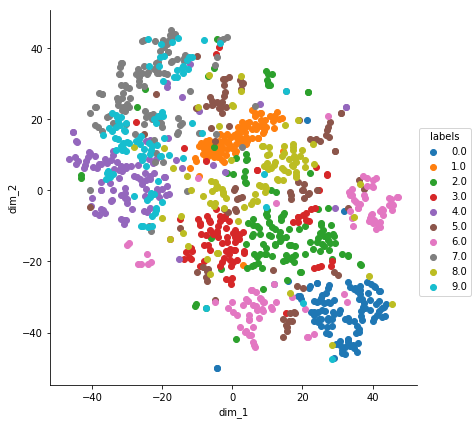

In [21]:
tsne_data_1 = np.vstack((tsne_data.T , label_1000)).T
tsne_df = pd.DataFrame(data = tsne_data_1 , columns = ('dim_1' , 'dim_2' , 'labels'))

sns.FacetGrid(tsne_df , hue = 'labels' , size = 6).map(plt.scatter , 'dim_1' , 'dim_2').add_legend()
plt.show()

## ok now letsa build a very simple logistic regression for the mnist data set

In [22]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


# Split the data set 

In [23]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_label , test_label = train_test_split(d , l , test_size = 0.15 , random_state = 23)
print('train image shape' , train_x.shape)
print('train label  shape' , train_label.shape)
print('test image shape' , test_x.shape)
print('test_label shape' , test_label.shape)

train image shape (35700, 784)
train label  shape (35700,)
test image shape (6300, 784)
test_label shape (6300,)


# Standardize the data , note that we will here just fit on the training data and transform on the train and test data 

In [24]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


In [25]:
train_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# now import the PCA , so that 95% if thye variance is preserved 

In [26]:
from sklearn.decomposition import PCA 

pca = PCA(0.95)
## fit using train data 
pca.fit(train_x)
pca.n_components_

317

## so 317 components are needed to explain the 95% of variance . Now lets transform the training and test data to apply the the simple logistic regression 


In [27]:
train = pca.transform(train_x) 
test = pca.transform(test_x)
print('train shape' , train.shape)
print('test shape' , test.shape)


train shape (35700, 317)
test shape (6300, 317)


In [28]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [29]:
logisticRegr.fit(train, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
logisticRegr.score(test , test_label)

0.9146031746031746

## We got a fairly good accuracy of 91.4% just by a simple logistic regression . Cheers , More to come .